In [1]:
import numpy as np
import cv2 as cv 
from skimage import io
from google.colab.patches import cv2_imshow # for image display

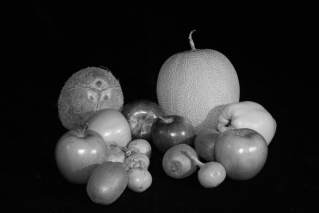

In [2]:
img = io.imread('/content/enforced/81882-130260/Fruits_examimage.jpg?d2lSessionVal=LnvN8uJMyKUOsXxFlNqxoWILG&ou=81882') 
width = int(img.shape[1] * 20 / 100)
height = int(img.shape[0] * 20/ 100)
dim = (width, height)
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#convert to Grayscale image for better detection
gray_image1 = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
cv2_imshow(gray_image1)

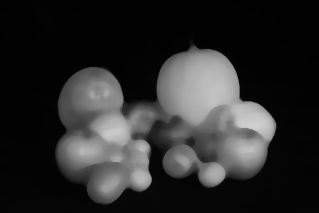

In [3]:
#Detect circles in the image
# median blur reduce the excessive detection of circles
gray_image = cv.medianBlur(gray_image1,9)
cv2_imshow(gray_image)


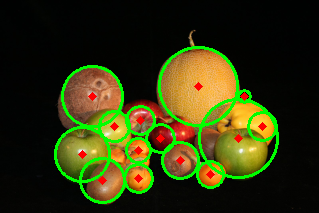

In [4]:
# hyperparameter for circle detection
''' Detection Method: OpenCV has an advanced implementation, HOUGH_GRADIENT, which uses gradient of the edges instead of filling up the entire 3D accumulator matrix, thereby speeding up the process.
dp: This is the ratio of the resolution of original image to the accumulator matrix.
minDist: This parameter controls the minimum distance between detected circles.
Param1: Canny edge detection requires two parameters — minVal and maxVal. Param1 is the higher threshold of the two. The second one is set as Param1/2.
Param2: This is the accumulator threshold for the candidate detected circles. By increasing this threshold value, we can ensure that only the best circles, corresponding to larger accumulator values, are returned.
minRadius: Minimum circle radius.
maxRadius: Maximum circle radius.'''
circles = cv.HoughCircles(gray_image,cv.HOUGH_GRADIENT, 0.2, 25, param1=200, param2=10, minRadius=5, maxRadius=40,)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(img,(i[0],i[1]),2,(0,0,255),3)	
cv2_imshow(img)